In [1]:
import pandas as pd

df_zap = pd.read_csv('zap_data_22.csv')
df_calib = pd.read_csv('calib.csv')

print(df_zap)
print(df_calib)

              lat        lon   timestamp  speed  voltage  \
0             NaN        NaN  1704056413    NaN    25.20   
1             NaN        NaN  1704056636    NaN    25.20   
2             NaN        NaN  1704056661    NaN    25.20   
3             NaN        NaN  1704056751    NaN    25.20   
4             NaN        NaN  1704056727    NaN    25.20   
...           ...        ...         ...    ...      ...   
161529  56.070923  37.123569  1735678101    0.0    25.35   
161530  56.070923  37.123569  1735678251    0.0    25.35   
161531  56.070923  37.123569  1735678401    0.0    25.35   
161532  56.070923  37.123569  1735678551    0.0    25.35   
161533  56.070923  37.123569  1735678700    0.0    25.35   

                                                 can_data  
0                        {"LLS_0": 1477, "xLLS_71": 1477}  
1                        {"LLS_0": 1477, "xLLS_71": 1477}  
2                        {"LLS_0": 1477, "xLLS_71": 1477}  
3                        {"LLS_0": 1477

In [2]:
import json
# Извлекаем калибровочные данные
calib_data = json.loads(df_calib['calibrating_data'].iloc[0])
print(calib_data)
# Предполагаем, что в JSON есть массивы x (показания датчика) и y (литры)
x = []
y = []
for cur in calib_data:
    x.append(cur['input_value'])
    y.append(cur['output_value'])

print(x)
# Создаем функцию интерполяции
from scipy import interpolate
f = interpolate.interp1d(x, y, fill_value='extrapolate')


[{'input_value': 500, 'output_value': 0}, {'input_value': 516, 'output_value': 10}, {'input_value': 579, 'output_value': 30}, {'input_value': 643, 'output_value': 50}, {'input_value': 706, 'output_value': 70}, {'input_value': 770, 'output_value': 90}, {'input_value': 832, 'output_value': 110}, {'input_value': 908, 'output_value': 130}, {'input_value': 989, 'output_value': 150}, {'input_value': 1072, 'output_value': 170}, {'input_value': 1159, 'output_value': 190}, {'input_value': 1249, 'output_value': 210}, {'input_value': 1343, 'output_value': 230}, {'input_value': 1439, 'output_value': 250}, {'input_value': 1539, 'output_value': 270}, {'input_value': 1647, 'output_value': 290}, {'input_value': 1757, 'output_value': 310}, {'input_value': 1875, 'output_value': 330}]
[500, 516, 579, 643, 706, 770, 832, 908, 989, 1072, 1159, 1249, 1343, 1439, 1539, 1647, 1757, 1875]


In [3]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import json

# Сначала преобразуем строковые представления словарей в реальные словари Python
df_zap['data'] = df_zap['can_data'].apply(lambda x: json.loads(x))

# Теперь создаем новый столбец LLS, извлекая значение LLS_0
df_zap['LLS'] = df_zap['data'].apply(lambda x: x.get('LLS_0'))

df_zap['LITRS'] = df_zap['LLS'].apply(lambda x: f(x))

# Если нужно, можно удалить промежуточный столбец data
df_zap.drop(columns=['data'], inplace=True)
df_zap.drop(columns=['can_data'], inplace=True)


df_zap['date'] = pd.to_datetime(df_zap['timestamp'], unit='s')
# df_zap.drop(columns=['timestamp'], inplace=True)

print(df_zap)
print(df_zap.describe())



              lat        lon   timestamp  speed  voltage     LLS       LITRS  \
0             NaN        NaN  1704056413    NaN    25.20  1477.0  257.600000   
1             NaN        NaN  1704056636    NaN    25.20  1477.0  257.600000   
2             NaN        NaN  1704056661    NaN    25.20  1477.0  257.600000   
3             NaN        NaN  1704056751    NaN    25.20  1477.0  257.600000   
4             NaN        NaN  1704056727    NaN    25.20  1477.0  257.600000   
...           ...        ...         ...    ...      ...     ...         ...   
161529  56.070923  37.123569  1735678101    0.0    25.35  3345.0  579.152542   
161530  56.070923  37.123569  1735678251    0.0    25.35  3345.0  579.152542   
161531  56.070923  37.123569  1735678401    0.0    25.35  3345.0  579.152542   
161532  56.070923  37.123569  1735678551    0.0    25.35  3345.0  579.152542   
161533  56.070923  37.123569  1735678700    0.0    25.35  3345.0  579.152542   

                      date  
0      202

In [4]:

df_cleaned = df_zap.dropna()
print("После удаления строк с NaN:")
print(df_cleaned)
print(df_cleaned.describe())

После удаления строк с NaN:
              lat        lon   timestamp  speed  voltage     LLS       LITRS  \
117     56.071346  37.116501  1704063741    0.0    25.05  1477.0  257.600000   
118     56.071346  37.116501  1704063631    0.0    25.05  1477.0  257.600000   
123     56.071346  37.116501  1704063741    0.0    25.05  1477.0  257.600000   
124     56.071346  37.116501  1704063631    0.0    25.05  1477.0  257.600000   
128     56.071346  37.116501  1704063631    0.0    25.05  1477.0  257.600000   
...           ...        ...         ...    ...      ...     ...         ...   
161529  56.070923  37.123569  1735678101    0.0    25.35  3345.0  579.152542   
161530  56.070923  37.123569  1735678251    0.0    25.35  3345.0  579.152542   
161531  56.070923  37.123569  1735678401    0.0    25.35  3345.0  579.152542   
161532  56.070923  37.123569  1735678551    0.0    25.35  3345.0  579.152542   
161533  56.070923  37.123569  1735678700    0.0    25.35  3345.0  579.152542   

           

In [5]:
import datetime

print(df_cleaned[df_cleaned['date'] > datetime.datetime(2024, 10, 1)])

              lat        lon   timestamp  speed  voltage     LLS       LITRS  \
105874  56.071388  37.116543  1727936432    0.0    27.60  1113.0  179.425287   
105875  56.071388  37.116543  1727936581    0.0    27.75  1110.0  178.735632   
105876  56.071388  37.116543  1727936731    0.0    27.75  1123.0  181.724138   
105877  56.071388  37.116543  1727936881    0.0    27.75  1121.0  181.264368   
105878  56.071388  37.116543  1727936950    0.0    27.75  1120.0  181.034483   
...           ...        ...         ...    ...      ...     ...         ...   
161529  56.070923  37.123569  1735678101    0.0    25.35  3345.0  579.152542   
161530  56.070923  37.123569  1735678251    0.0    25.35  3345.0  579.152542   
161531  56.070923  37.123569  1735678401    0.0    25.35  3345.0  579.152542   
161532  56.070923  37.123569  1735678551    0.0    25.35  3345.0  579.152542   
161533  56.070923  37.123569  1735678700    0.0    25.35  3345.0  579.152542   

                      date  
105874 202

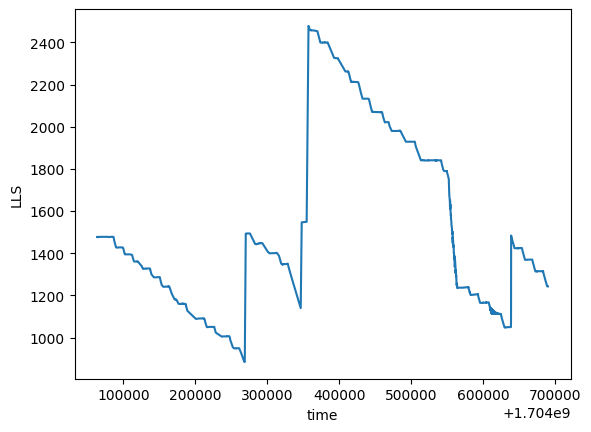

In [6]:
import matplotlib.pyplot as plt


cur_month_df = df_cleaned[(df_cleaned['timestamp'] >= 1704531600) & (df_cleaned['timestamp'] < 1704571200) ]
speed = cur_month_df['speed']
lls = cur_month_df['LLS']
time = cur_month_df['timestamp']


# plt.plot(time, speed, color='green', marker='o', markersize=7)
plt.plot(df_cleaned['timestamp'].head(2000), df_cleaned['LLS'].head(2000))
plt.xlabel('time')  #Подпись для оси х
plt.ylabel('LLS')  #Подпись для оси y
plt.show()


In [11]:
df = df_cleaned.head(100)

# разница между точками заправки должна быть три литра i > i+1 and i+1 - i > 3
# вывод алгоритма кортеж интервалов, где была заправка


# for row in df.itertuples():
#     print(f"timestamp: {row.timestamp}, LLS: {row.LLS}, speed: {row.speed}")


for i in range(len(df)):
    current = df.iloc[i]
    print(f"Строка124  {current}")


Строка124  lat                    56.071346
lon                    37.116501
timestamp             1704063741
speed                        0.0
voltage                    25.05
LLS                       1477.0
LITRS                      257.6
date         2023-12-31 23:02:21
Name: 117, dtype: object
Строка124  lat                    56.071346
lon                    37.116501
timestamp             1704063631
speed                        0.0
voltage                    25.05
LLS                       1477.0
LITRS                      257.6
date         2023-12-31 23:00:31
Name: 118, dtype: object
Строка124  lat                    56.071346
lon                    37.116501
timestamp             1704063741
speed                        0.0
voltage                    25.05
LLS                       1477.0
LITRS                      257.6
date         2023-12-31 23:02:21
Name: 123, dtype: object
Строка124  lat                    56.071346
lon                    37.116501
timestamp             1